# Домашнее задание по лекции 2: "Устройства полносвязных сетей - обучение MLP"

Что тебе предстоит сделать?

В этом ноутбуке предлагается изучить методы подбора гиперпараметров при обучении модели.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tqdm import tqdm

Подгружаем учебный датасет на бинарную классификацию, контекст особо нас не волнует)

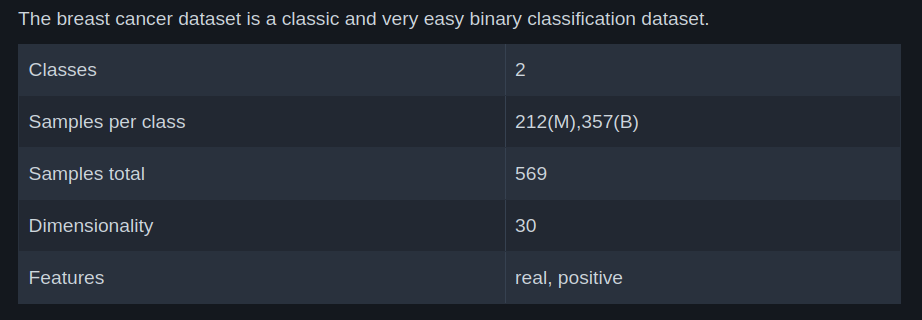

In [ ]:
# Загрузка данных, мы взяли Breast Cancer Dataset
data = load_breast_cancer()
X, y = data.data, data.target

Дальше делаем стандартизацию входных данных, это означает, что мы входные данные переводим в распределение с средним значением равным 0 и стандартным отклонением равным 1. По сути мы из каждого сэмпла вычитаем среднее значение по каждой фиче и делим на стандартное отклонение по каждой фиче.

Кстати говоря, важно считать среднее и стандартное отклонение только на трейне, чтобы не было data leak. Это когда модель во время обучения получает информацию о тестовом наборе данных, это может сказаться на достоверности оценки качества модели.

In [ ]:
# Предобработка данных
scaler = StandardScaler()

# Поделить данные на трейн и тест(для проверки выделите на тест 0.2 от всех данных)
X_train, X_test, y_train, y_test =

#обработайте даныне с скейлером

X_train =
X_test =

# Конвертация в тензоры PyTorch
X_train_tensor =
y_train_tensor =
X_test_tensor =
y_test_tensor =

# Создание TensorDataset
train_dataset =
test_dataset =

In [ ]:
train_size = len(X_train)
test_size = len(X_test)
total_size = train_size + test_size
expected_ratio = 0.2
actual_ratio = test_size / total_size
assert abs(actual_ratio - expected_ratio) < 1e-3, f"Ошибка: соотношение test/train должно быть {expected_ratio}, но сейчас {actual_ratio:.4f}"
assert X_train.shape[0] > 0, "Ошибка: X_train пустой"
assert X_test.shape[0] > 0, "Ошибка: X_test пустой"
assert len(train_dataset) == len(y_train), "Ошибка: размеры train_dataset и y_train не совпадают"
assert len(test_dataset) == len(y_test), "Ошибка: размеры test_dataset и y_test не совпадают"

print("Код заполнен верно!")

Код заполнен верно!


Определяем класс нашей модели

In [ ]:
# реализовать MLP, где через входящие параметры в методе __init__ можно выбирать количество слоёв, hidden_size, и функцию активации после линейного слоя (см. nn.Sequential)
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, activation):
        super(MLP, self).__init__()
        # ЗАПОЛНИТЬ

    def forward(self, x):
        # ЗАПОЛНИТЬ
        return

Пишем функцию обучения модели

In [ ]:
def train_model(params):
    # Инициализация модели
    model = MLP(
        input_size=X_train.shape[1],
        hidden_size=params['hidden_size'],
        num_layers=params['num_layers'],
        activation=params['activation'],
    )

    # Определение loss и оптимизатора с заданным в params значением lr
    criterion =
    optimizer =



    # Объявление DataLoader
    train_loader =

    for epoch in range(50):
        for inputs, labels in train_loader:
            # закончить реализацию train loop

    # Оценка на валидации
    with torch.no_grad():
        # реализовать подсчет метрики accuracy на валидационной выборке

    return accuracy

SyntaxError: invalid syntax (<ipython-input-6-62d2eed83193>, line 11)

Итак, первый метод перебора гиперпараметров с которым мы познакомимся, это Grid Search! По сути это просто полный перебор гиперпараметров из заданного диапозона

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, ClassifierMixin

Делаем класс для того, чтобы подать его в GridSearchCV, по сути нам нужен класс с методами fit, predict, score

In [ ]:
class MLPWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, hidden_size=64, num_layers=1, lr=0.001, epochs=50, activation="relu"):
        self.hidden_size =
        self.num_layers =
        self.lr =
        self.epochs =
        self.model =
        self.activation =

    def fit(self, X, y):
        # сформировать torch tensors
        X_tensor =
        y_tensor =
        # создать torch dataset и loader
        dataset =
        loader =

        criterion =
        optimizer =

        for epoch in range(self.epochs):
            for inputs, labels in loader:


        return self

    def predict(self, X):
      # предсказать классы(не вероятности) для X
        X_tensor =
        with torch.no_grad():
            # заполнить
        return

    def score(self, X, y):
        predictions = self.predict(X)
        return accuracy_score(y, predictions)

Делаем словарик с гиперпараметрами и их возможными значениями. Ставим подбор гиперпараметров. Мы делаем запуск c параметром cv = 3, это количество фолдов для кросс-валидации, подробнее про кросс-валидацию можно почитать в [хэндбуке](https://education.yandex.ru/handbook/ml/article/kross-validaciya)

In [ ]:
# Сетка параметров
param_grid = {
    'hidden_size': [32, 64, 128],
    'num_layers': [1, 2],
    'lr': [0.001, 0.01],
    'epochs': [50],
    'activation': ["relu", "sigmoid"]
}

# Создание GridSearchCV
grid_search = GridSearchCV(
    estimator=MLPWrapper(),
    param_grid=param_grid,
    scoring='accuracy',
    n_jobs=-1,  # Использование всех ядер процессора
    verbose=True,
    cv=3
)

# Запуск Grid Search
grid_search.fit(X_train, y_train)

# Лучшие параметры и точность
print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best parameters: {'activation': 'relu', 'epochs': 50, 'hidden_size': 32, 'lr': 0.001, 'num_layers': 1}
Best accuracy: 0.9713895666318114


Теперь перейдем к более оптимальному методу перебора гиперпараметров - Optuna! Она использует байесовскую оптимизацию, при котором оптимизируется вероятностная модель для предсказания, какие параметры дадут лучший результат. Каждую следующую попытку мы подбираем гиперпараметры так, чтобы балансировать между исследованием новых областей (exploration) и использованием уже известных хороших значений (exploitation)

In [ ]:
!pip install optuna -q  # Установка библиотеки

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 5.8 MB/s eta 0:00:00


In [ ]:
import optuna

In [ ]:
# задаем гиперпараметры для поиска и диапозон для них, можно выбрать как дискретный диапозон, так и вещественный

def objective(trial):
    params = {
        'hidden_size': trial.suggest_categorical('hidden_size', [64, 128, 256]),
        'num_layers': trial.suggest_int('num_layers', 1, 3),
        'lr': trial.suggest_loguniform('lr', 1e-4, 1e-2),
        'activation': trial.suggest_categorical('activation', ['relu', 'sigmoid'])
    }

    acc = train_model(params)
    return acc

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=15)

print("Best trial:")
trial = study.best_trial
print(f"Value (Accuracy): {trial.value:.4f}")
print("Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

[I 2025-03-20 06:41:31,916] A new study created in memory with name: no-name-5bfb07eb-2712-40bc-9c23-7ac0ae213b19
<ipython-input-11-79df62018b23>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lr': trial.suggest_loguniform('lr', 1e-4, 1e-2),
[I 2025-03-20 06:41:36,387] Trial 0 finished with value: 0.9649122807017544 and parameters: {'hidden_size': 256, 'num_layers': 3, 'lr': 0.001660927291164729, 'activation': 'relu'}. Best is trial 0 with value: 0.9649122807017544.
[I 2025-03-20 06:41:39,778] Trial 1 finished with value: 0.9824561403508771 and parameters: {'hidden_size': 64, 'num_layers': 2, 'lr': 0.0003860713160843078, 'activation': 'relu'}. Best is trial 1 with value: 0.9824561403508771.
[I 2025-03-20 06:41:41,915] Trial 2 finished with value: 0.9824561403508771 and parameters: {'hidden_size': 128, 'num_layers': 1, 'lr': 

Best trial:
Value (Accuracy): 0.9912
Params: 
    hidden_size: 256
    num_layers: 1
    lr: 0.00016058873485620665
    activation: sigmoid


In [ ]:
trials_df = study.trials_dataframe()
trials_df

,number,value,datetime_start,datetime_complete,duration,params_activation,params_hidden_size,params_lr,params_num_layers,state
0,0,0.964912,2025-03-20 06:41:31.919999,2025-03-20 06:41:36.387448,0 days 00:00:04.467449,relu,256,0.001661,3,COMPLETE
1,1,0.982456,2025-03-20 06:41:36.391911,2025-03-20 06:41:39.778324,0 days 00:00:03.386413,relu,64,0.000386,2,COMPLETE
2,2,0.982456,2025-03-20 06:41:39.779839,2025-03-20 06:41:41.914861,0 days 00:00:02.135022,sigmoid,128,0.000174,1,COMPLETE
3,3,0.991228,2025-03-20 06:41:41.916677,2025-03-20 06:41:43.719518,0 days 00:00:01.802841,sigmoid,256,0.000161,1,COMPLETE
4,4,0.964912,2025-03-20 06:41:43.720933,2025-03-20 06:41:47.391845,0 days 00:00:03.670912,relu,256,0.000126,2,COMPLETE
5,5,0.973684,2025-03-20 06:41:47.394700,2025-03-20 06:41:51.960022,0 days 00:00:04.565322,relu,128,0.000250,2,COMPLETE
6,6,0.991228,2025-03-20 06:41:51.964635,2025-03-20 06:41:55.199407,0 days 00:00:03.234772,sigmoid,128,0.000356,2,COMPLETE
7,7,0.973684,2025-03-20 06:41:55.201939,2025-03-20 06:41:57.331733,0 days 00:00:02.129794,relu,256,0.001023,2,COMPLETE
8,8,0.991228,2025-03-20 06:41:57.334513,2025-03-20 06:41:58.729769,0 days 00:00:01.395256,sigmoid,128,0.000133,3,COMPLETE
9,9,0.982456,2025-03-20 06:41:58.730819,2025-03-20 06:41:59.567682,0 days 00:00:00.836863,relu,64,0.000871,1,COMPLETE


In [ ]:
import optuna.visualization as vis

# Визуализация истории оптимизации
vis.plot_optimization_history(study).show()